# Flip or Flop

##### This exploritory data analysis of Kings County Housing Data is intended for house flippers, trying to get the most bang for their buck. With house flippers in mind, I was interested to see if there was a relationship between houses price, house age, and zipcode.

##### To figure this out, I used various data analysis and vizualisation techniques to understand the type of relationship between house price, house age, and zipcode.

# Objectives

1) Explore and understand the data
   - Look at trends, extreme, null and missing values.
   - Added column to Data Set called "house_age"
   
2) Clean & Visualize The Data 
   - Before looking at my main variables: zipcodes, price, and house age,
     I am going to clean my data by dealing with the missing values
   - I see outliers, which I am going to tackle later on.
   - I am going to look at the missing values again and then replace them.
 
3) Modeling
   - sklearn modeling
   - splitting dataset into train and test sets
   - statsmodeling
   - ols

# Data
#### The Kings County Housing Data Set is named "kc_house_data.csv". 

Import Modules, import and rename csv file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rcParams

%matplotlib inline
%pylab inline 

kc_df = pd.read_csv('kc_house_data.csv')

Populating the interactive namespace from numpy and matplotlib


# 1.) Explore and understand the data

### Goals
###### * Look at trends, extreme, null and missing values
###### * Added column to Data Set called "house_age"

In [2]:
kc_df.head()

# Take a peek at the data and see if anything does not look right off the start.
# I can already see a NaN value for waterfront and year renovated aswell.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Process
###### * Exploring column names and index range to see if there are missing values in the dataset.
###### * Also noting the type of data: integer, float, or object. 

In [3]:
kc_df.info()
# 21 columns, 21597 data entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Note
###### * My code above returned that I have missing values in "waterfront", "view", and "year renovated"
###### * Now I want to double check this using "isna()" 

In [ ]:
kc_df.isna().sum()

###### * The outputs above look like both methods pointed out the same number of missing values in the dataset.

### Next Step
#### Creating new variable "house_age" and adding it to our dataset.


In [4]:
kc_df['house_age'] = 2019 - kc_df['yr_built']

In [5]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,64
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,68
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,86
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,54
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,32


In [6]:
kc_df['house_age']

0         64
1         68
2         86
3         54
4         32
5         18
6         24
7         56
8         59
9         16
10        54
11        77
12        92
13        42
14       119
15        40
16        25
17       103
18        98
19        50
20        72
21        51
22        24
23        34
24        34
25        78
26       104
27       110
28        71
29        14
        ... 
21567     76
21568     12
21569     10
21570     10
21571     13
21572     12
21573      9
21574     12
21575      5
21576     11
21577     13
21578     11
21579     13
21580      5
21581     12
21582      5
21583     16
21584     11
21585     11
21586      5
21587     16
21588      5
21589      5
21590     10
21591     11
21592     10
21593      5
21594     10
21595     15
21596     11
Name: house_age, Length: 21597, dtype: int64

In [7]:
kc_df['house_age'].head()

0    64
1    68
2    86
3    54
4    32
Name: house_age, dtype: int64

# 2.) Clean & Visualize The Data

### Process
##### * Before looking at my main variables: zipcodes, price, and house age,
##### * I am going to clean my data by dealing with the missing values
##### * I see outliers, which I am going to tackle later on.
##### * I am going to look at the missing values again and then replace them.

### Next Step
######  Now I am going to copy the kc_df to look at the data - called "newkc_df"

In [8]:
newkc_df = kc_df.copy()
newkc_df.head()

#Reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,64
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,68
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,86
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,54
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,32


### Next Step
###### Removing objects ('date', 'sqft_basement') and 'id' column,
###### because this data is not neccessary for what I am looking at.

In [9]:
newkc_df.drop(columns = ['id', 'date', 'sqft_basement' ], inplace=True)

In [10]:
newkc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
house_age        21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


### Visualize
#### Now I am going to visualize the data and check to see what the column variables look like based on price.

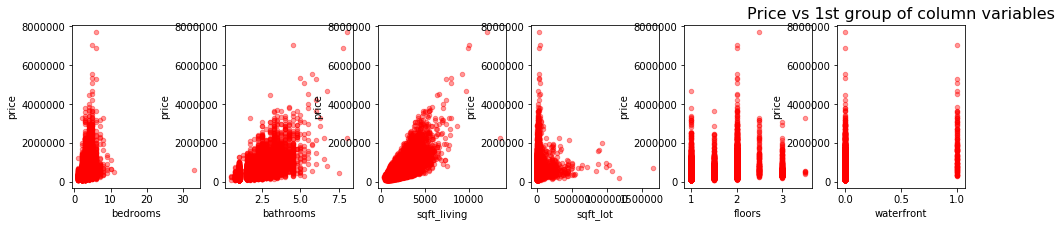

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(newkc_df)[1:7], axes):
                    newkc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'r');

plt.title('Price vs 1st group of column variables', fontsize = 16)
plt.savefig("Price vs bed,bath,sqft_liv,sqft_lot,floors,waterfront.png")

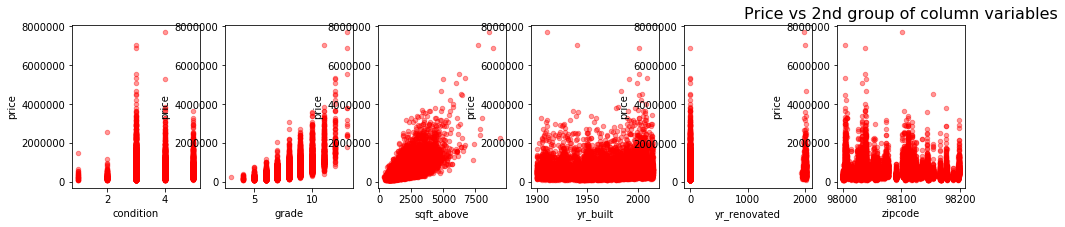

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(newkc_df)[8:14], axes):
                    newkc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'r');

plt.title('Price vs 2nd group of column variables', fontsize = 16)
plt.savefig("Price vs condition,grade,sqft_above,yr_built,yr_renovated,zipcode.png")

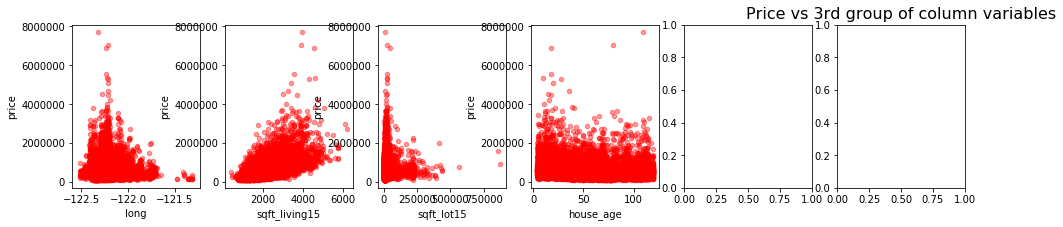

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(newkc_df)[15:20], axes):
                    newkc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'r');

plt.title('Price vs 3rd group of column variables', fontsize = 16)
plt.savefig("Price vs longitude,sqft_living15,sqft_lot15,house_age.png")

### Observations
#### * I see outliers and will deal with those later on.
#### * I also note a strong correlation in grade with respect to price, as well as sqft_living with respect to price.
#### * With this knowledge, I want to explore sqft_living as a target variable and I want to look at variables with more mystery behind them.
#### * I am interested in looking into the relationship between house_age, sqft_living, bedrooms, and zipcode with respect to price.

### Next Step
#### Take care of na values using isna().sum() function

In [21]:
newkc_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
house_age           0
dtype: int64

In [22]:
newkc_df['yr_renovated'] = newkc_df['yr_renovated'].fillna(0)
newkc_df['view'] = newkc_df['view'].fillna(0)
newkc_df['waterfront'] = newkc_df['waterfront'].fillna(0)

newkc_df.isna().sum()

#https://datatofish.com/replace-nan-values-with-zeros/

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
house_age        0
dtype: int64

In [23]:
newkc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
house_age        21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


### Next Step: Dealing with outliers
#### Now that I dealt with missing values, I can use IQR method to remove outliers from the dataframe.

In [24]:
Q1 = newkc_df.quantile(0.25)
Q3 = newkc_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

price            323000.0000
bedrooms              1.0000
bathrooms             0.7500
sqft_living        1120.0000
sqft_lot           5645.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             1.0000
grade                 1.0000
sqft_above         1020.0000
yr_built             46.0000
yr_renovated          0.0000
zipcode              85.0000
lat                   0.2069
long                  0.2030
sqft_living15       870.0000
sqft_lot15         4983.0000
house_age            46.0000
dtype: float64


In [25]:
print(newkc_df < (Q1 - 1.5 * IQR)) |(newkc_df > (Q3 + 1.5 * IQR))

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      False     False      False        False     False   False       False   
1      False     False      False        False     False   False       False   
2      False     False      False        False     False   False       False   
3      False     False      False        False     False   False       False   
4      False     False      False        False     False   False       False   
5      False     False      False        False     False   False       False   
6      False     False      False        False     False   False       False   
7      False     False      False        False     False   False       False   
8      False     False      False        False     False   False       False   
9      False     False      False        False     False   False       False   
10     False     False      False        False     False   False       False   
11     False     False      False       

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [26]:
newkc_df_out = newkc_df[~((newkc_df < (Q1 - 1.5 * IQR)) |(newkc_df > (Q3 + 1.5 * IQR))).any(axis=1)]
newkc_df_out.shape

(15094, 19)

### Result
#### * Now the outliers are removed from the Dataset "newkc_df"

### Next Step:
##### * Here I want to see the average house price for every house age (1, 2, 3, 4 (years old), etc.) 
##### * Now I want to visualize the data and graph it with a bar graph to try and answer my question:

### Goal is to answer my question:

## Question 1: Which zip codes can I get the best bang for my buck when purchasing a house

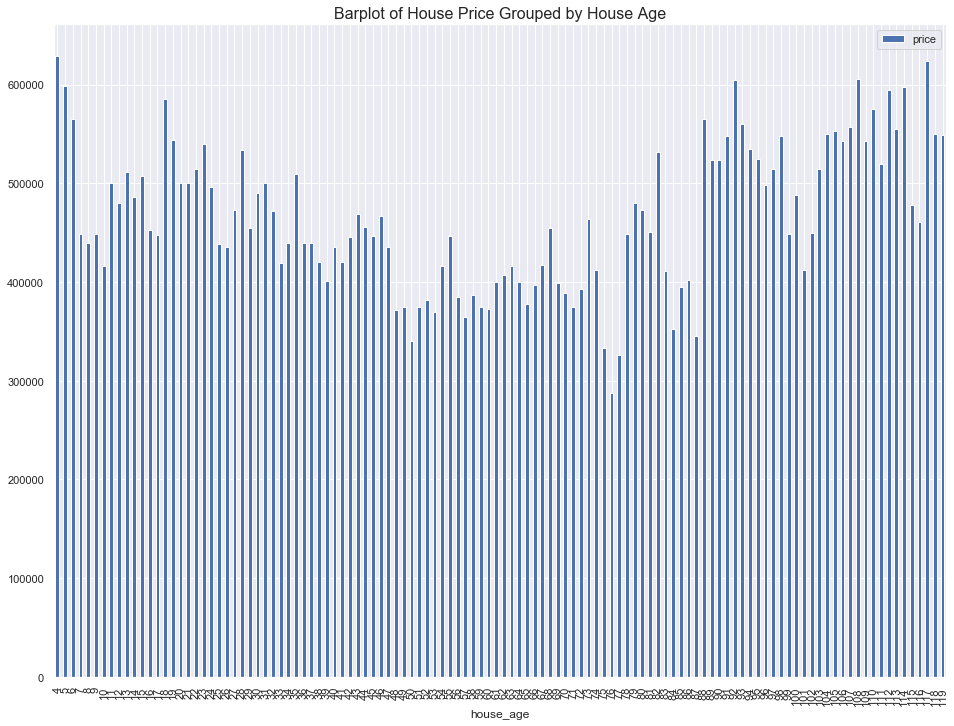

In [29]:
sns.set(rc={'figure.figsize': (16,12)})
new_df = kc_df[['house_age', 'price']].copy().rename(columns = {'median': 'median price $'})
new_df.groupby("house_age").median().plot(y='price', kind = 'bar')

plt.title('Barplot of House Price Grouped by House Age', fontsize = 16)
plt.savefig("House Price vs House Age.png")

### Result:
###### * Great, we can see that houses 76 years old have the lowest average price of around 290k.
###### * This is the only average price based on house age under 300k. That's a good start

In [30]:
newkc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
house_age        21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


### Next Step:
#### * Now I want to visually look at how Price effects zipcode, and how house age effects zip code.
#### * First I want to get an idea of my zipcode data.

In [31]:
newkc_df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [32]:
newkc_df['zipcode'].describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

### Observation:
#### Great! I see the value counts per zipcode from The Kings County Dataset. Now we can look to answer my second question:

## Question 2: Which zipcodes have the highest average house prices?
### Goal: Look at how price effects zipcode

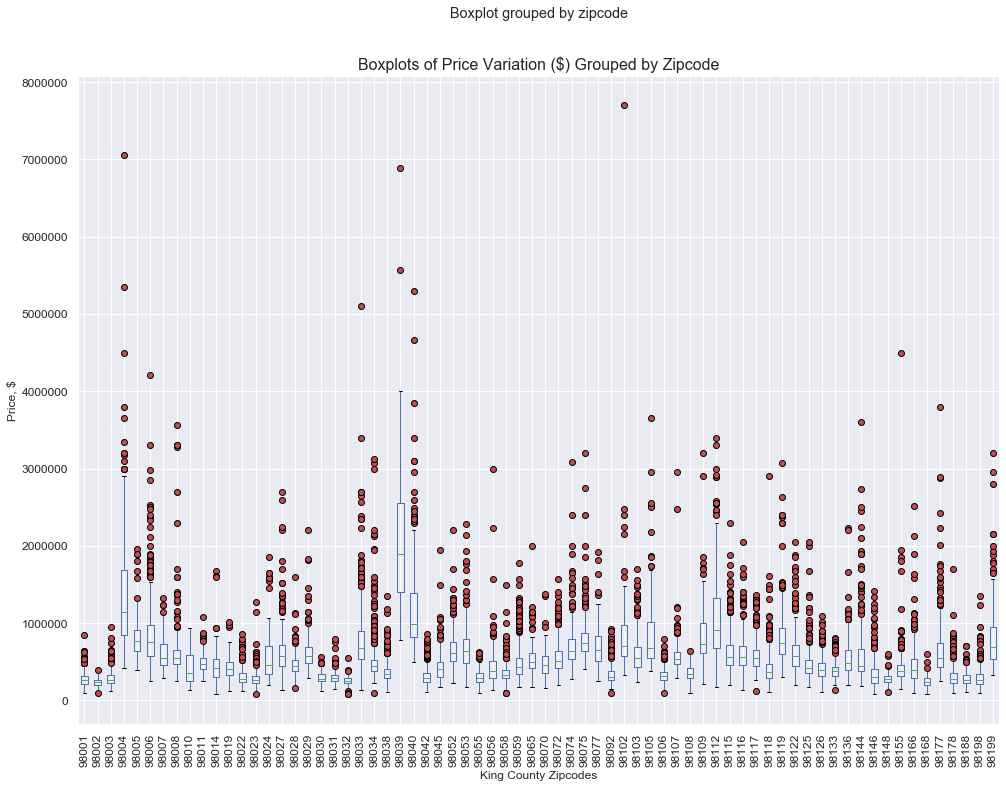

In [33]:
red = dict(markerfacecolor='r')
sns.set(rc={'figure.figsize': (16,12)})
newkc_df.boxplot(by='zipcode', column='price', fontsize = 12, rot = 90, flierprops = red);

plt.title('Boxplots of Price Variation ($) Grouped by Zipcode', fontsize = 16)

plt.xlabel('King County Zipcodes', fontsize = 12);
plt.ylabel('Price, $', fontsize = 12);
plt.savefig("Price vs Zip.png")


# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

## Result:
####  98039 has the highest average house price
#### * Note - outlieres are still present which may skew data, but overall the avergage house price for 98039 looks way higher than the rest.

## Question 3: Which zip codes have the oldest houses that I could renovate?
### Goal: Looking at how house_age effects zipcode


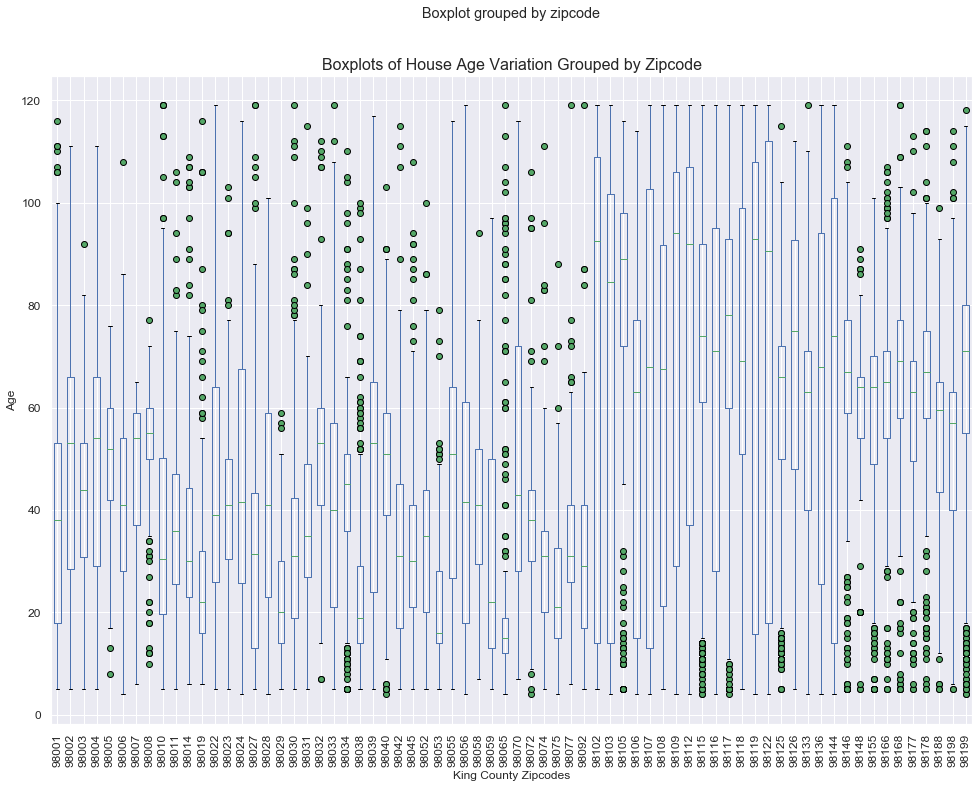

In [34]:
green = dict(markerfacecolor='g')
sns.set(rc={'figure.figsize': (16,12)})
newkc_df.boxplot(by='zipcode', column='house_age', fontsize = 12, rot = 90, flierprops = green);

plt.title('Boxplots of House Age Variation Grouped by Zipcode', fontsize = 16)

plt.xlabel('King County Zipcodes', fontsize = 12);
plt.ylabel('Age', fontsize = 12);
plt.savefig("House Age vs Zip.png")


# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

### Result:
#### 98102 Zipcode average house age is between 90-95 years old. Yet, on average, the house prices range from 50k-100k when analyzing 98102 column in the price/zipcode graph for question 2.

### Next Step:
#### Now I want to finalize which target variables I will analyze in Step 3: Modeling
####  * First I want to take a peek at the columns one more time
####  * Then graph my 5 target variables (including price) and see their relationships to eachother.

In [35]:
newkc_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age'],
      dtype='object')

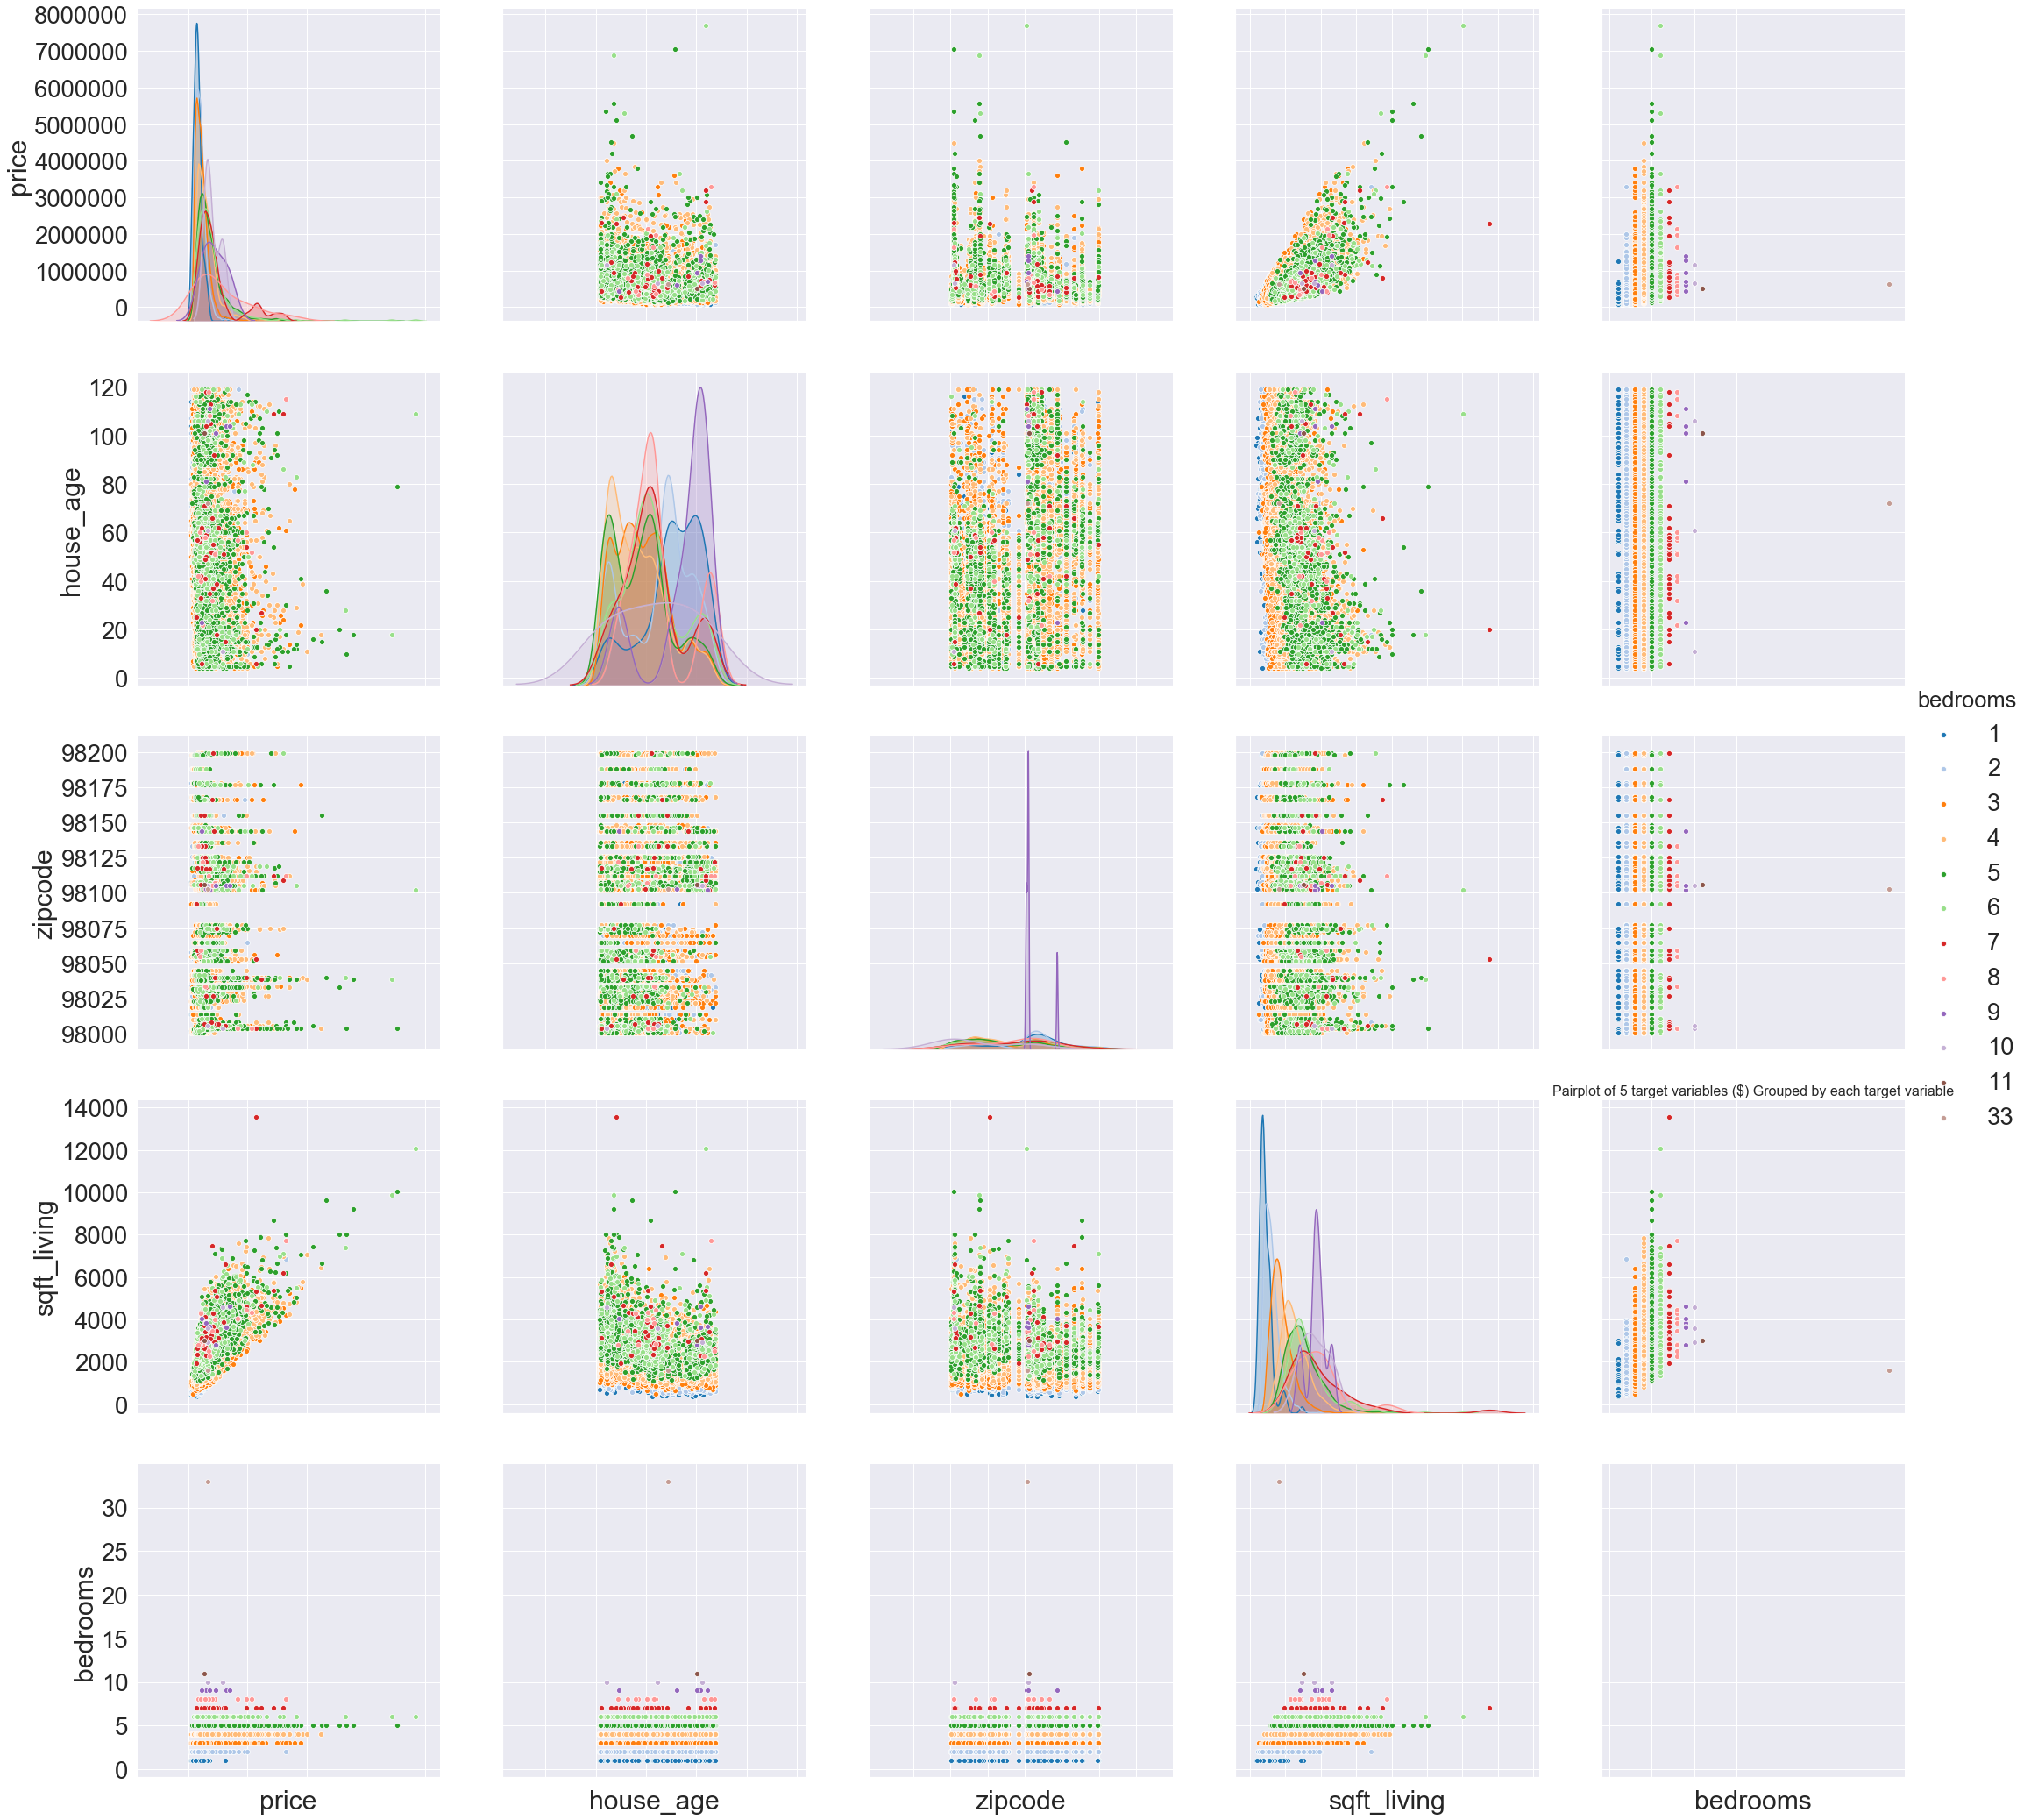

In [37]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(newkc_df[['price','house_age','zipcode','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',height=6)
g.set(xticklabels=[]);

plt.title('Pairplot of 5 target variables ($) Grouped by each target variable', fontsize = 16)
plt.savefig("Target Variables Pairplot.png")

# 3.) Modeling

## * sklearn modeling
#### * splitting the dataset into train and validation sets

In [38]:
X = newkc_df[['house_age','zipcode','sqft_living','bedrooms']]
y = newkc_df[['price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 10)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print(f"R2 score: {r2_score(y_test, y_pred)}")

print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.5503993021431164
MSE score: 59074738004.54869


### r2 score = 0.5503993021431164

In [ ]:
#r2 close to 1 is good, mse close to 0 is good.

In [40]:
X = newkc_df[['house_age','zipcode','sqft_living','bedrooms', 'grade']]
y = newkc_df[['price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 10)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print(f"R2 score: {r2_score(y_test, y_pred)}")

print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.6130299142907581
MSE score: 50845464737.57483


### r2 score = 0.6130299142907581

In [ ]:
#https://www.kaggle.com/divan0/multiple-linear-regression
#https://medium.com/data-science-everywhere/linear-regression-in-python-28dbe9674e36

## * statsmodels modeling

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
m = ols('price ~ house_age',newkc_df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.12e-15
Time:                        10:09:08   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.727e+05   4782.196    119.753      0.0

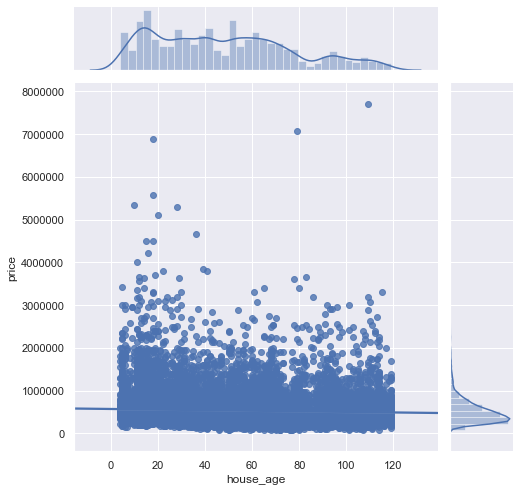

<Figure size 1152x864 with 0 Axes>

In [46]:
sns.jointplot(x="house_age", y="price", data=newkc_df, kind = 'reg',fit_reg= True, height = 7)
plt.show()

plt.savefig("Price vs House_age.png")

###### Good to see graphically because it doesent make much sense
###### Since the price values and house age values are in completely different ranges.

In [47]:
m = ols('price ~ house_age + zipcode',newkc_df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     46.38
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           7.92e-21
Time:                        10:14:31   Log-Likelihood:            -3.0734e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21594   BIC:                         6.147e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.711e+07   4.87e+06      5.562      0.0

### r2 = .004 (WOW)

In [48]:
m = ols('price ~ house_age + zipcode + sqft_living + bedrooms',newkc_df).fit()
print (m.summary())

#https://www.springboard.com/blog/data-mining-python-tutorial/

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     6366.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:14:35   Log-Likelihood:            -2.9898e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.033e+07   3.33e+06     -6.099      

### r2 = .541 (WAHOO!)
### p value = 0 (WAHOOx2)

# Overview

### With an adjusted r2 of .541, the relationship is moderately strong and we did a good job on our model. Let's look into this relationship further and bring our findings to our next stakeholder meeting!